# Audio Emotion Recognition System

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import librosa as lr
import librosa.display
import IPython.display as ipd
from PIL import Image
import os
from sklearn.model_selection import train_test_split

In [3]:
data_dir = "./audio"
audio_files = glob(data_dir + "/*.wav")

In [4]:
data = pd.DataFrame()
Emotion = []
Emotional_Intensity = []
Statement = []
Statement_Text = []
Repetition = []
Actor = []

In [5]:
for i in range(len(audio_files)):
    temp = audio_files[i][audio_files[i].index("\\")+1:audio_files[0].index(".wav")].split("-")
    
    # creating Emotion
    if temp[2] == "01":
        Emotion.append(1)
    if temp[2] == "02":
        Emotion.append(2)
    if temp[2] == "03":
        Emotion.append(3)
    if temp[2] == "04":
        Emotion.append(4)
    if temp[2] == "05":
        Emotion.append(5)
    if temp[2] == "06":
        Emotion.append(6)
    if temp[2] == "07":
        Emotion.append(7)
    if temp[2] == "08":
        Emotion.append(8)

   ############################

    # creating Emotinal_Intensity
    if temp[3] == "01":
        Emotional_Intensity.append(1)
    if temp[3] == "02":
        Emotional_Intensity.append(2)
        
   #############################

    # creating Statement
    if temp[4] == "01":
        Statement.append(1)
        Statement_Text.append("Kids are talking by the door")
    if temp[4] == "02":
        Statement.append(2)
        Statement_Text.append("Dogs are sitting by the door")
        
    ############################
    
    # creating Repetition
    if temp[5] == "01":
        Repetition.append(1)
    if temp[5] == "02":
        Repetition.append(2)
        
    ###########################
    
    # creating actor gender
    if int(temp[6])%2 == 0:   # even --> female
        Actor.append(1)
    if int(temp[6])%2 == 1:   # odd --> male
        Actor.append(0)    


In [6]:
data["Emotion"] = Emotion
data["Emotional_Intensity"] = Emotional_Intensity
data["Statement"] = Statement
data["Statement_Text"] = Statement_Text
data["Repetition"] = Repetition
data["Actor_Gender"] = Actor

In [7]:
def graph_amplitude(audio):
    audio_files, sfreq_files = lr.load(audio)
    time_files = np.arange(0, len(audio_files)) / sfreq_files
    fig, ax = plt.subplots()
    ax.plot(time_files, audio_files, color="darkblue")
    ax.set(xlabel="Time(s)", ylabel="Sound Amplitude")
    plt.savefig(audio[8:-4]+".png")

In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def normalize_gray(array):
    return (array - array.min())/(array.max() - array.min())

In [9]:
def resize(image_file):
    img_org = Image.open(image_file).convert("L")
    width_org, height_org = img_org.size
    factor = 0.20
    width = int(width_org * factor)
    height = int(height_org * factor)
    # best down-sizing filter
    img_anti = img_org.resize((width, height), Image.ANTIALIAS)
    # split image filename into name and extension
    name, ext = os.path.splitext(image_file)
    # create a new file name for saving the result
    new_image_file = "%s%s" % (name,ext)
    img_anti.save(new_image_file)

In [ ]:
for i in audio_files:
    graph_amplitude(i)

In [ ]:
amplitudes = "./amplitudes"
amplitude_images = glob(amplitudes + "/*.png")
for i in amplitude_images:
    resize(i)

In [12]:
dataset = []
for i in amplitude_images:
    myTemp = Image.open(i)
    myArray = normalize_gray(np.asarray(myTemp, dtype="float32"))
    dataset.append(myArray)

In [48]:
# feature extraction
mfcc = []
chroma_stft = []
chroma_cqt = []
chroma_cens = []
rms = []
spectral_contrast = []
spectral_bandwidth = []
tonnetz = []
zcr = []

for i in range(0,len(audio_files)):
    
    y, sr = lr.load(audio_files[i],res_type="kaiser_fast",duration=3,offset=0.5)
    sr = np.array(sr)
    mfcc.append(np.mean(lr.feature.mfcc(y=y,n_mfcc=25,)))
    chroma_stft.append(np.mean(lr.feature.chroma_stft(y=y)))
    chroma_cqt.append(np.mean(lr.feature.chroma_cqt(y=y)))
    chroma_cens.append(np.mean(lr.feature.chroma_cens(y=y)))
    rms.append(np.mean(lr.feature.rms(y=y)))
    spectral_contrast.append(np.mean(lr.feature.spectral_contrast(y=y)))
    spectral_bandwidth.append(np.mean(lr.feature.spectral_bandwidth(y=y)))
    tonnetz.append(np.mean(lr.feature.tonnetz(y=y)))
    zcr.append(np.mean(lr.feature.mfcc(y=y)))

In [49]:
mfccTarget = pd.DataFrame()
mfccTarget["mfcc"] = mfcc
mfccTarget["chroma_stft"] = chroma_stft
mfccTarget["chroma_cqt"] = chroma_cqt
mfccTarget["chroma_cens"] = chroma_cens
mfccTarget["rms"] = rms
mfccTarget["spectral_contrast"] = spectral_contrast
mfccTarget["spectral_bandwidth"] = spectral_bandwidth
mfccTarget["tonnetz"] = tonnetz
mfccTarget["zcr"] = zcr

In [ ]:
# Model 1

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataset,data["Emotion"].to_numpy(), test_size=0.30, random_state=42,shuffle=True)

In [15]:
X_train = np.array(X_train).reshape(len(X_train),86,57,1)
X_test = np.array(X_test).reshape(len(X_test),86,57,1)

Train on 1008 samples, validate on 432 samples
Epoch 1/10
1008/1008 [==============================] - 13s 13ms/step - loss: 2.1586 - accuracy: 0.1558 - val_loss: 1.9852 - val_accuracy: 0.2917
Epoch 2/10
1008/1008 [==============================] - 13s 13ms/step - loss: 1.8426 - accuracy: 0.2927 - val_loss: 1.8271 - val_accuracy: 0.2963
Epoch 3/10
1008/1008 [==============================] - 13s 13ms/step - loss: 1.6714 - accuracy: 0.3790 - val_loss: 1.7971 - val_accuracy: 0.3333
Epoch 4/10
1008/1008 [==============================] - 14s 14ms/step - loss: 1.5333 - accuracy: 0.4444 - val_loss: 1.8226 - val_accuracy: 0.3148
Epoch 5/10
1008/1008 [==============================] - 13s 13ms/step - loss: 1.3810 - accuracy: 0.5169 - val_loss: 1.8829 - val_accuracy: 0.3218
Epoch 6/10
1008/1008 [==============================] - 13s 13ms/step - loss: 1.2315 - accuracy: 0.5655 - val_loss: 1.7870 - val_accuracy: 0.3704
Epoch 7/10
1008/1008 [==============================] - 14s 14ms/step - loss:

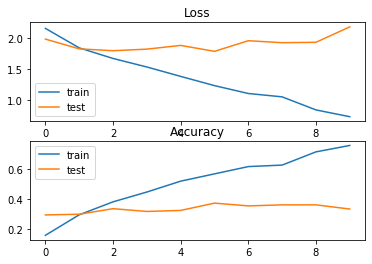

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from matplotlib import pyplot

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(86,57,1)))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(9, activation="softmax"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [17]:
train = np.array(X_train).reshape(-1,86,57,1)
test = np.array(X_test).reshape(-1,86,57,1)

In [21]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train[10].reshape(1,86,57,1))

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index = 0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

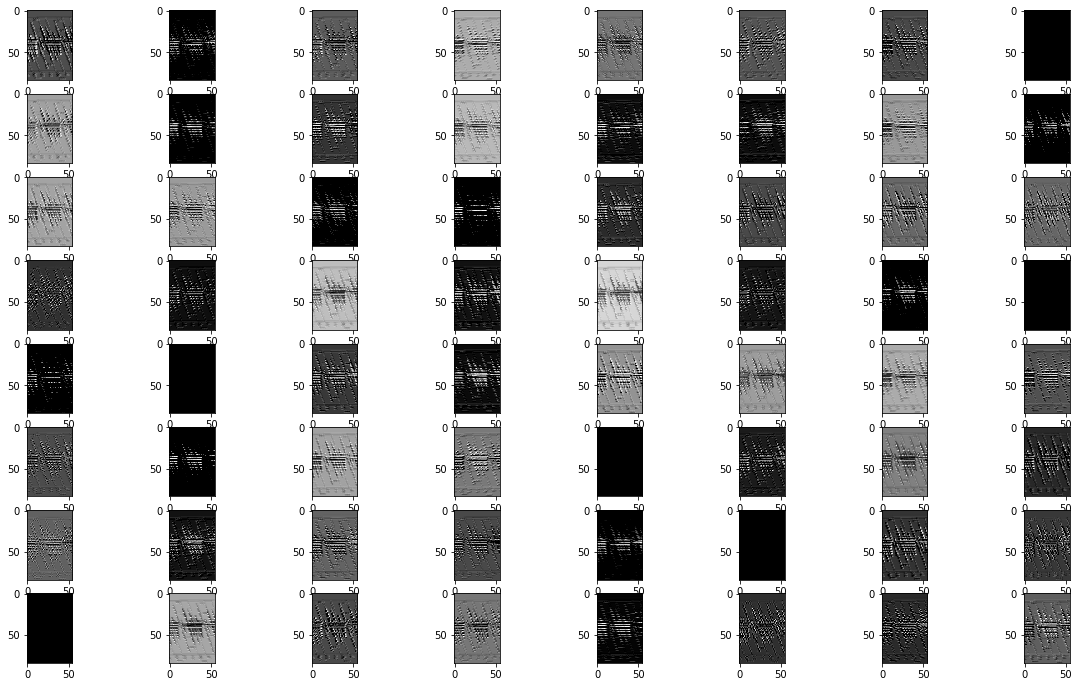

In [22]:
display_activation(activations, 8, 8, 0)     # amplitude weights for layer 1

In [ ]:
# Model 2 (epoch 10)

Train on 1008 samples, validate on 432 samples
Epoch 1/10
1008/1008 [==============================] - 7s 7ms/step - loss: 2.1200 - accuracy: 0.1359 - val_loss: 2.0534 - val_accuracy: 0.1296
Epoch 2/10
1008/1008 [==============================] - 6s 6ms/step - loss: 2.0710 - accuracy: 0.1528 - val_loss: 2.0533 - val_accuracy: 0.1944
Epoch 3/10
1008/1008 [==============================] - 7s 6ms/step - loss: 2.0564 - accuracy: 0.1766 - val_loss: 2.0386 - val_accuracy: 0.1227
Epoch 4/10
1008/1008 [==============================] - 6s 6ms/step - loss: 2.0397 - accuracy: 0.1756 - val_loss: 2.0245 - val_accuracy: 0.1435
Epoch 5/10
1008/1008 [==============================] - 6s 6ms/step - loss: 2.0018 - accuracy: 0.2073 - val_loss: 1.9657 - val_accuracy: 0.1875
Epoch 6/10
1008/1008 [==============================] - 6s 6ms/step - loss: 1.9471 - accuracy: 0.2361 - val_loss: 1.9294 - val_accuracy: 0.2361
Epoch 7/10
1008/1008 [==============================] - 6s 6ms/step - loss: 1.8680 - accu

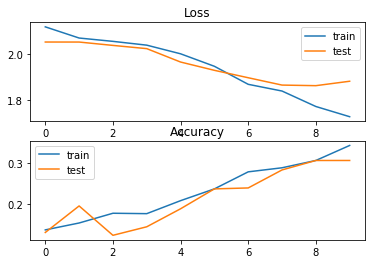

In [23]:
from keras.layers import MaxPooling2D, Dropout

# create model
model = Sequential()
# add model layers
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(86,57,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(9, activation="softmax"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


In [ ]:
# Model 2 (epoch 50)

Train on 1008 samples, validate on 432 samples
Epoch 1/50
1008/1008 [==============================] - 6s 6ms/step - loss: 2.1268 - accuracy: 0.1438 - val_loss: 2.0749 - val_accuracy: 0.1204
Epoch 2/50
1008/1008 [==============================] - 6s 6ms/step - loss: 2.0809 - accuracy: 0.1438 - val_loss: 2.0501 - val_accuracy: 0.1343
Epoch 3/50
1008/1008 [==============================] - 6s 6ms/step - loss: 2.0540 - accuracy: 0.1538 - val_loss: 2.0261 - val_accuracy: 0.1759
Epoch 4/50
1008/1008 [==============================] - 6s 6ms/step - loss: 2.0051 - accuracy: 0.2083 - val_loss: 1.9823 - val_accuracy: 0.2245
Epoch 5/50
1008/1008 [==============================] - 7s 7ms/step - loss: 1.9393 - accuracy: 0.2450 - val_loss: 1.9325 - val_accuracy: 0.2315
Epoch 6/50
1008/1008 [==============================] - 7s 7ms/step - loss: 1.8580 - accuracy: 0.2847 - val_loss: 1.9004 - val_accuracy: 0.2616
Epoch 7/50
1008/1008 [==============================] - 7s 7ms/step - loss: 1.8050 - accu

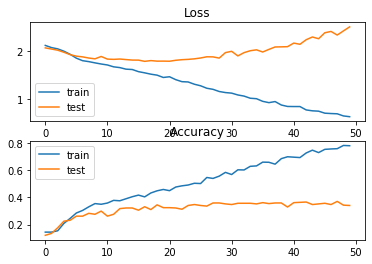

In [24]:
from keras.layers import MaxPooling2D, Dropout

# create model
model = Sequential()
# add model layers
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(86,57,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(9, activation="softmax"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


In [ ]:
# Model 3

In [51]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten,Dropout,MaxPooling1D,Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint

X_train, X_test, y_train, y_test = train_test_split(np.asarray(mfcc),data["Emotion"].to_numpy(), test_size=0.30, random_state=42,shuffle=True)
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

model = Sequential()
model.add(Conv1D(256, 5, padding='same', input_shape=(13,259))) #1
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same')) #2
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5, padding='same')) #3
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same')) #6
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(9)) #7
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[es])

pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


ValueError: Error when checking input: expected conv1d_17_input to have 3 dimensions, but got array with shape (1008, 1)

In [34]:
import seaborn as sn

In [ ]:
# Model 4
# Random Forest

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
# data = mfcc

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(np.array(mfcc).reshape(-1,1),data["Emotion"],test_size=0.30, random_state=42,shuffle=True)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train,y_train)

print("Random Forest algorithm result: ",rf.score(X_test,y_test))

Random Forest algorithm result:  0.16898148148148148


In [53]:
# data = mfccTarget

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(mfccTarget,data["Emotion"],test_size=0.30, random_state=42,shuffle=True)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train,y_train)

print("Random Forest algorithm result: ",rf.score(X_test,y_test))

Random Forest algorithm result:  0.42824074074074076


In [54]:
# estimators = 1000

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(mfccTarget,data["Emotion"],test_size=0.30, random_state=42,shuffle=True)

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train,y_train)

print("Random Forest algorithm result: ",rf.score(X_test,y_test))

Random Forest algorithm result:  0.4305555555555556


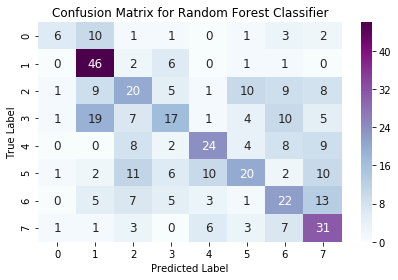

In [55]:
%matplotlib inline

predictions = rf.predict(X_test)
#labels = ["Neutral","Calm", "Happy", "Sad", "Angry", "Fearful", "Disgust", "Suprised"]
matrix = confusion_matrix(y_test, predictions)
sn.heatmap(matrix, annot=True, cmap="BuPu", annot_kws={"size": 12})

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Random Forest Classifier')

plt.ylim([8,0]) 
plt.tight_layout()
plt.show()

In [ ]:
# Model 5
# Catboost

In [56]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(random_seed=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0:	learn: 2.0585479	total: 24.3ms	remaining: 24.3s
1:	learn: 2.0440940	total: 43.8ms	remaining: 21.9s
2:	learn: 2.0268935	total: 62.7ms	remaining: 20.8s
3:	learn: 2.0127598	total: 82.1ms	remaining: 20.4s
4:	learn: 1.9957352	total: 101ms	remaining: 20.1s
5:	learn: 1.9797034	total: 121ms	remaining: 20s
6:	learn: 1.9661554	total: 140ms	remaining: 19.8s
7:	learn: 1.9522945	total: 158ms	remaining: 19.6s
8:	learn: 1.9389154	total: 178ms	remaining: 19.6s
9:	learn: 1.9259169	total: 197ms	remaining: 19.5s
10:	learn: 1.9127283	total: 217ms	remaining: 19.6s
11:	learn: 1.8991862	total: 238ms	remaining: 19.6s
12:	learn: 1.8854136	total: 257ms	remaining: 19.5s
13:	learn: 1.8752248	total: 276ms	remaining: 19.4s
14:	learn: 1.8640805	total: 295ms	remaining: 19.4s
15:	learn: 1.8536119	total: 313ms	remaining: 19.2s
16:	learn: 1.8423802	total: 332ms	remaining: 19.2s
17:	learn: 1.8337145	total: 350ms	remaining: 19.1s
18:	learn: 1.8230709	total: 369ms	remaining: 19.1s
19:	learn: 1.8143786	total: 388ms	remai

168:	learn: 1.2463847	total: 3.46s	remaining: 17s
169:	learn: 1.2447928	total: 3.49s	remaining: 17s
170:	learn: 1.2431890	total: 3.51s	remaining: 17s
171:	learn: 1.2413449	total: 3.53s	remaining: 17s
172:	learn: 1.2391903	total: 3.55s	remaining: 17s
173:	learn: 1.2375307	total: 3.58s	remaining: 17s
174:	learn: 1.2353483	total: 3.6s	remaining: 17s
175:	learn: 1.2333645	total: 3.62s	remaining: 17s
176:	learn: 1.2318896	total: 3.65s	remaining: 17s
177:	learn: 1.2298967	total: 3.67s	remaining: 17s
178:	learn: 1.2275141	total: 3.69s	remaining: 16.9s
179:	learn: 1.2253178	total: 3.71s	remaining: 16.9s
180:	learn: 1.2232676	total: 3.73s	remaining: 16.9s
181:	learn: 1.2208593	total: 3.75s	remaining: 16.9s
182:	learn: 1.2195727	total: 3.77s	remaining: 16.8s
183:	learn: 1.2175433	total: 3.79s	remaining: 16.8s
184:	learn: 1.2149257	total: 3.81s	remaining: 16.8s
185:	learn: 1.2131501	total: 3.83s	remaining: 16.8s
186:	learn: 1.2121169	total: 3.85s	remaining: 16.7s
187:	learn: 1.2103536	total: 3.87

333:	learn: 1.0086233	total: 6.77s	remaining: 13.5s
334:	learn: 1.0072287	total: 6.79s	remaining: 13.5s
335:	learn: 1.0062284	total: 6.81s	remaining: 13.5s
336:	learn: 1.0044369	total: 6.83s	remaining: 13.4s
337:	learn: 1.0027915	total: 6.84s	remaining: 13.4s
338:	learn: 1.0016726	total: 6.86s	remaining: 13.4s
339:	learn: 1.0004651	total: 6.88s	remaining: 13.4s
340:	learn: 0.9992479	total: 6.9s	remaining: 13.3s
341:	learn: 0.9980881	total: 6.92s	remaining: 13.3s
342:	learn: 0.9969017	total: 6.94s	remaining: 13.3s
343:	learn: 0.9956515	total: 6.96s	remaining: 13.3s
344:	learn: 0.9944660	total: 6.98s	remaining: 13.2s
345:	learn: 0.9931272	total: 7s	remaining: 13.2s
346:	learn: 0.9923466	total: 7.01s	remaining: 13.2s
347:	learn: 0.9913722	total: 7.03s	remaining: 13.2s
348:	learn: 0.9902668	total: 7.05s	remaining: 13.2s
349:	learn: 0.9892178	total: 7.07s	remaining: 13.1s
350:	learn: 0.9882174	total: 7.09s	remaining: 13.1s
351:	learn: 0.9873353	total: 7.11s	remaining: 13.1s
352:	learn: 0.98

499:	learn: 0.8411977	total: 10.1s	remaining: 10.1s
500:	learn: 0.8401119	total: 10.1s	remaining: 10.1s
501:	learn: 0.8395522	total: 10.1s	remaining: 10s
502:	learn: 0.8385751	total: 10.1s	remaining: 10s
503:	learn: 0.8375863	total: 10.2s	remaining: 9.99s
504:	learn: 0.8369094	total: 10.2s	remaining: 9.97s
505:	learn: 0.8357412	total: 10.2s	remaining: 9.95s
506:	learn: 0.8348688	total: 10.2s	remaining: 9.93s
507:	learn: 0.8339590	total: 10.2s	remaining: 9.91s
508:	learn: 0.8334993	total: 10.2s	remaining: 9.89s
509:	learn: 0.8328315	total: 10.3s	remaining: 9.87s
510:	learn: 0.8320348	total: 10.3s	remaining: 9.85s
511:	learn: 0.8310206	total: 10.3s	remaining: 9.82s
512:	learn: 0.8302074	total: 10.3s	remaining: 9.8s
513:	learn: 0.8294566	total: 10.3s	remaining: 9.78s
514:	learn: 0.8283343	total: 10.4s	remaining: 9.76s
515:	learn: 0.8278607	total: 10.4s	remaining: 9.74s
516:	learn: 0.8271721	total: 10.4s	remaining: 9.72s
517:	learn: 0.8263379	total: 10.4s	remaining: 9.7s
518:	learn: 0.8252

661:	learn: 0.7195433	total: 13.2s	remaining: 6.75s
662:	learn: 0.7184917	total: 13.2s	remaining: 6.73s
663:	learn: 0.7181586	total: 13.3s	remaining: 6.71s
664:	learn: 0.7175026	total: 13.3s	remaining: 6.68s
665:	learn: 0.7170769	total: 13.3s	remaining: 6.67s
666:	learn: 0.7162634	total: 13.3s	remaining: 6.64s
667:	learn: 0.7154649	total: 13.3s	remaining: 6.62s
668:	learn: 0.7151808	total: 13.3s	remaining: 6.6s
669:	learn: 0.7146232	total: 13.4s	remaining: 6.58s
670:	learn: 0.7137953	total: 13.4s	remaining: 6.56s
671:	learn: 0.7130864	total: 13.4s	remaining: 6.54s
672:	learn: 0.7126348	total: 13.4s	remaining: 6.52s
673:	learn: 0.7119208	total: 13.4s	remaining: 6.5s
674:	learn: 0.7114748	total: 13.5s	remaining: 6.48s
675:	learn: 0.7109788	total: 13.5s	remaining: 6.46s
676:	learn: 0.7104530	total: 13.5s	remaining: 6.44s
677:	learn: 0.7097841	total: 13.5s	remaining: 6.42s
678:	learn: 0.7094001	total: 13.5s	remaining: 6.4s
679:	learn: 0.7089561	total: 13.6s	remaining: 6.38s
680:	learn: 0.7

829:	learn: 0.6136523	total: 16.4s	remaining: 3.36s
830:	learn: 0.6132335	total: 16.4s	remaining: 3.34s
831:	learn: 0.6124312	total: 16.4s	remaining: 3.32s
832:	learn: 0.6116199	total: 16.4s	remaining: 3.3s
833:	learn: 0.6112512	total: 16.5s	remaining: 3.28s
834:	learn: 0.6106933	total: 16.5s	remaining: 3.26s
835:	learn: 0.6103623	total: 16.5s	remaining: 3.24s
836:	learn: 0.6098608	total: 16.5s	remaining: 3.22s
837:	learn: 0.6093272	total: 16.5s	remaining: 3.2s
838:	learn: 0.6085601	total: 16.6s	remaining: 3.18s
839:	learn: 0.6078445	total: 16.6s	remaining: 3.16s
840:	learn: 0.6071517	total: 16.6s	remaining: 3.14s
841:	learn: 0.6066137	total: 16.6s	remaining: 3.12s
842:	learn: 0.6062037	total: 16.6s	remaining: 3.1s
843:	learn: 0.6057935	total: 16.6s	remaining: 3.08s
844:	learn: 0.6052814	total: 16.7s	remaining: 3.06s
845:	learn: 0.6046305	total: 16.7s	remaining: 3.04s
846:	learn: 0.6040240	total: 16.7s	remaining: 3.02s
847:	learn: 0.6038034	total: 16.7s	remaining: 3s
848:	learn: 0.6032

991:	learn: 0.5323410	total: 19.5s	remaining: 157ms
992:	learn: 0.5316490	total: 19.5s	remaining: 138ms
993:	learn: 0.5313238	total: 19.5s	remaining: 118ms
994:	learn: 0.5307235	total: 19.6s	remaining: 98.3ms
995:	learn: 0.5302440	total: 19.6s	remaining: 78.6ms
996:	learn: 0.5299188	total: 19.6s	remaining: 59ms
997:	learn: 0.5295585	total: 19.6s	remaining: 39.3ms
998:	learn: 0.5292183	total: 19.6s	remaining: 19.7ms
999:	learn: 0.5287714	total: 19.7s	remaining: 0us


0.4212962962962963

0:	learn: 2.0585479	total: 27.2ms	remaining: 27.1s
1:	learn: 2.0440940	total: 51.7ms	remaining: 25.8s
2:	learn: 2.0268935	total: 73.6ms	remaining: 24.5s
3:	learn: 2.0127598	total: 93.2ms	remaining: 23.2s
4:	learn: 1.9957352	total: 115ms	remaining: 22.8s
5:	learn: 1.9797034	total: 134ms	remaining: 22.3s
6:	learn: 1.9661554	total: 153ms	remaining: 21.8s
7:	learn: 1.9522945	total: 172ms	remaining: 21.3s
8:	learn: 1.9389154	total: 191ms	remaining: 21s
9:	learn: 1.9259169	total: 209ms	remaining: 20.7s
10:	learn: 1.9127283	total: 229ms	remaining: 20.6s
11:	learn: 1.8991862	total: 252ms	remaining: 20.8s
12:	learn: 1.8854136	total: 270ms	remaining: 20.5s
13:	learn: 1.8752248	total: 290ms	remaining: 20.4s
14:	learn: 1.8640805	total: 311ms	remaining: 20.4s
15:	learn: 1.8536119	total: 329ms	remaining: 20.3s
16:	learn: 1.8423802	total: 350ms	remaining: 20.2s
17:	learn: 1.8337145	total: 369ms	remaining: 20.1s
18:	learn: 1.8230709	total: 389ms	remaining: 20.1s
19:	learn: 1.8143786	total: 409ms	remai

161:	learn: 1.2584555	total: 3.4s	remaining: 17.6s
162:	learn: 1.2566605	total: 3.42s	remaining: 17.6s
163:	learn: 1.2554769	total: 3.44s	remaining: 17.5s
164:	learn: 1.2542400	total: 3.46s	remaining: 17.5s
165:	learn: 1.2518552	total: 3.48s	remaining: 17.5s
166:	learn: 1.2496305	total: 3.5s	remaining: 17.4s
167:	learn: 1.2478775	total: 3.52s	remaining: 17.4s
168:	learn: 1.2463847	total: 3.53s	remaining: 17.4s
169:	learn: 1.2447928	total: 3.55s	remaining: 17.3s
170:	learn: 1.2431890	total: 3.57s	remaining: 17.3s
171:	learn: 1.2413449	total: 3.59s	remaining: 17.3s
172:	learn: 1.2391903	total: 3.62s	remaining: 17.3s
173:	learn: 1.2375307	total: 3.64s	remaining: 17.3s
174:	learn: 1.2353483	total: 3.66s	remaining: 17.3s
175:	learn: 1.2333645	total: 3.68s	remaining: 17.2s
176:	learn: 1.2318896	total: 3.7s	remaining: 17.2s
177:	learn: 1.2298967	total: 3.71s	remaining: 17.2s
178:	learn: 1.2275141	total: 3.73s	remaining: 17.1s
179:	learn: 1.2253178	total: 3.75s	remaining: 17.1s
180:	learn: 1.2

323:	learn: 1.0207809	total: 6.56s	remaining: 13.7s
324:	learn: 1.0195002	total: 6.58s	remaining: 13.7s
325:	learn: 1.0185387	total: 6.59s	remaining: 13.6s
326:	learn: 1.0170769	total: 6.61s	remaining: 13.6s
327:	learn: 1.0158991	total: 6.63s	remaining: 13.6s
328:	learn: 1.0148440	total: 6.65s	remaining: 13.6s
329:	learn: 1.0138672	total: 6.67s	remaining: 13.5s
330:	learn: 1.0124244	total: 6.69s	remaining: 13.5s
331:	learn: 1.0111490	total: 6.71s	remaining: 13.5s
332:	learn: 1.0096795	total: 6.73s	remaining: 13.5s
333:	learn: 1.0086233	total: 6.75s	remaining: 13.4s
334:	learn: 1.0072287	total: 6.76s	remaining: 13.4s
335:	learn: 1.0062284	total: 6.78s	remaining: 13.4s
336:	learn: 1.0044369	total: 6.8s	remaining: 13.4s
337:	learn: 1.0027915	total: 6.82s	remaining: 13.4s
338:	learn: 1.0016726	total: 6.84s	remaining: 13.3s
339:	learn: 1.0004651	total: 6.86s	remaining: 13.3s
340:	learn: 0.9992479	total: 6.88s	remaining: 13.3s
341:	learn: 0.9980881	total: 6.89s	remaining: 13.3s
342:	learn: 0

487:	learn: 0.8518428	total: 9.72s	remaining: 10.2s
488:	learn: 0.8511024	total: 9.74s	remaining: 10.2s
489:	learn: 0.8502726	total: 9.76s	remaining: 10.2s
490:	learn: 0.8493440	total: 9.78s	remaining: 10.1s
491:	learn: 0.8489057	total: 9.8s	remaining: 10.1s
492:	learn: 0.8480315	total: 9.82s	remaining: 10.1s
493:	learn: 0.8477006	total: 9.84s	remaining: 10.1s
494:	learn: 0.8466485	total: 9.85s	remaining: 10.1s
495:	learn: 0.8454816	total: 9.87s	remaining: 10s
496:	learn: 0.8442677	total: 9.89s	remaining: 10s
497:	learn: 0.8431700	total: 9.91s	remaining: 9.99s
498:	learn: 0.8423035	total: 9.93s	remaining: 9.97s
499:	learn: 0.8411977	total: 9.95s	remaining: 9.95s
500:	learn: 0.8401119	total: 9.97s	remaining: 9.93s
501:	learn: 0.8395522	total: 9.99s	remaining: 9.91s
502:	learn: 0.8385751	total: 10s	remaining: 9.88s
503:	learn: 0.8375863	total: 10s	remaining: 9.86s
504:	learn: 0.8369094	total: 10s	remaining: 9.84s
505:	learn: 0.8357412	total: 10.1s	remaining: 9.82s
506:	learn: 0.8348688	t

654:	learn: 0.7242486	total: 12.9s	remaining: 6.77s
655:	learn: 0.7234162	total: 12.9s	remaining: 6.75s
656:	learn: 0.7229011	total: 12.9s	remaining: 6.73s
657:	learn: 0.7221690	total: 12.9s	remaining: 6.71s
658:	learn: 0.7215169	total: 12.9s	remaining: 6.69s
659:	learn: 0.7207998	total: 13s	remaining: 6.67s
660:	learn: 0.7200067	total: 13s	remaining: 6.65s
661:	learn: 0.7195433	total: 13s	remaining: 6.63s
662:	learn: 0.7184917	total: 13s	remaining: 6.61s
663:	learn: 0.7181586	total: 13s	remaining: 6.59s
664:	learn: 0.7175026	total: 13s	remaining: 6.57s
665:	learn: 0.7170769	total: 13.1s	remaining: 6.55s
666:	learn: 0.7162634	total: 13.1s	remaining: 6.53s
667:	learn: 0.7154649	total: 13.1s	remaining: 6.51s
668:	learn: 0.7151808	total: 13.1s	remaining: 6.49s
669:	learn: 0.7146232	total: 13.1s	remaining: 6.47s
670:	learn: 0.7137953	total: 13.2s	remaining: 6.45s
671:	learn: 0.7130864	total: 13.2s	remaining: 6.43s
672:	learn: 0.7126348	total: 13.2s	remaining: 6.41s
673:	learn: 0.7119208	to

814:	learn: 0.6234833	total: 16s	remaining: 3.63s
815:	learn: 0.6225875	total: 16s	remaining: 3.61s
816:	learn: 0.6217605	total: 16s	remaining: 3.59s
817:	learn: 0.6209369	total: 16.1s	remaining: 3.57s
818:	learn: 0.6200013	total: 16.1s	remaining: 3.55s
819:	learn: 0.6193395	total: 16.1s	remaining: 3.53s
820:	learn: 0.6184187	total: 16.1s	remaining: 3.51s
821:	learn: 0.6174900	total: 16.1s	remaining: 3.5s
822:	learn: 0.6170401	total: 16.2s	remaining: 3.48s
823:	learn: 0.6166111	total: 16.2s	remaining: 3.46s
824:	learn: 0.6159572	total: 16.2s	remaining: 3.44s
825:	learn: 0.6154261	total: 16.2s	remaining: 3.42s
826:	learn: 0.6148172	total: 16.2s	remaining: 3.4s
827:	learn: 0.6144774	total: 16.3s	remaining: 3.38s
828:	learn: 0.6139924	total: 16.3s	remaining: 3.36s
829:	learn: 0.6136523	total: 16.3s	remaining: 3.34s
830:	learn: 0.6132335	total: 16.3s	remaining: 3.32s
831:	learn: 0.6124312	total: 16.3s	remaining: 3.3s
832:	learn: 0.6116199	total: 16.3s	remaining: 3.28s
833:	learn: 0.6112512

981:	learn: 0.5377205	total: 19.3s	remaining: 354ms
982:	learn: 0.5371013	total: 19.3s	remaining: 334ms
983:	learn: 0.5364675	total: 19.4s	remaining: 315ms
984:	learn: 0.5359857	total: 19.4s	remaining: 295ms
985:	learn: 0.5354931	total: 19.4s	remaining: 275ms
986:	learn: 0.5347825	total: 19.4s	remaining: 256ms
987:	learn: 0.5343450	total: 19.4s	remaining: 236ms
988:	learn: 0.5340152	total: 19.5s	remaining: 216ms
989:	learn: 0.5336342	total: 19.5s	remaining: 197ms
990:	learn: 0.5331737	total: 19.5s	remaining: 177ms
991:	learn: 0.5323410	total: 19.5s	remaining: 157ms
992:	learn: 0.5316490	total: 19.5s	remaining: 138ms
993:	learn: 0.5313238	total: 19.6s	remaining: 118ms
994:	learn: 0.5307235	total: 19.6s	remaining: 98.4ms
995:	learn: 0.5302440	total: 19.6s	remaining: 78.8ms
996:	learn: 0.5299188	total: 19.6s	remaining: 59.1ms
997:	learn: 0.5295585	total: 19.7s	remaining: 39.4ms
998:	learn: 0.5292183	total: 19.7s	remaining: 19.7ms
999:	learn: 0.5287714	total: 19.7s	remaining: 0us


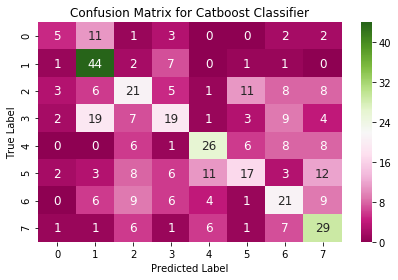

In [57]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(random_seed=42)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
#clf.score(X_test, y_test)
matrix = confusion_matrix(y_test, predictions)
sn.heatmap(matrix, annot=True, cmap="PiYG", annot_kws={"size": 12})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Catboost Classifier')
plt.ylim([8,0]) 
plt.tight_layout()
plt.show()

In [ ]:
# Model 6
# Gradient Boost

Confusion Matrix:
[[ 1 13  2  5  1  0  1  1]
 [ 2 32  5 14  1  1  1  0]
 [ 0  9 20 11  4  3  7  9]
 [ 1 23 10 14  1  2  6  7]
 [ 0  1 10  1 24  3  6 10]
 [ 0  7  7  7 12 16  2 11]
 [ 0  7 12  4  6  1 14 12]
 [ 0  2  8  1  3  4  7 27]]
Classification Report
              precision    recall  f1-score   support

           1       0.25      0.04      0.07        24
           2       0.34      0.57      0.43        56
           3       0.27      0.32      0.29        63
           4       0.25      0.22      0.23        64
           5       0.46      0.44      0.45        55
           6       0.53      0.26      0.35        62
           7       0.32      0.25      0.28        56
           8       0.35      0.52      0.42        52

    accuracy                           0.34       432
   macro avg       0.35      0.33      0.31       432
weighted avg       0.35      0.34      0.33       432



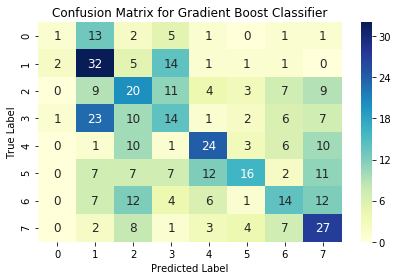

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth=2, random_state=42)
gb_clf.fit(X_train, y_train)

predictions = gb_clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

matrix = confusion_matrix(y_test, predictions)
sn.heatmap(matrix, annot=True, cmap="YlGnBu", annot_kws={"size": 12})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Gradient Boost Classifier')
plt.ylim([8,0]) 
plt.tight_layout()
plt.show()

In [ ]:
# Model 7

In [96]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', multi_class='auto').fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred, average='weighted')))
print('Recall Score : ' + str(recall_score(y_test,y_pred, average='weighted')))
print('F1 Score : ' + str(f1_score(y_test,y_pred, average='weighted')))

#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.24537037037037038
Precision Score : 0.1815119004727264
Recall Score : 0.24537037037037038
F1 Score : 0.20423777890033354
Confusion Matrix : 
[[ 0 11  0  0  1  4  2  6]
 [ 0 29  7  0  5  2  8  5]
 [ 0 16 14  1  6  5 10 11]
 [ 0 19 11  0  6  4 10 14]
 [ 0  5  9  1 25  6  3  6]
 [ 0  6  7  1 25  4  5 14]
 [ 0  9 14  0  6  6 12  9]
 [ 0  8  4  0  5 10  3 22]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [97]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=9, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30, 50, 100, 500]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.134921 using {'neurons': 1}
0.134921 (0.003712) with: {'neurons': 1}
0.134921 (0.003712) with: {'neurons': 5}
0.134921 (0.003712) with: {'neurons': 10}
0.134921 (0.003712) with: {'neurons': 15}
0.134921 (0.003712) with: {'neurons': 20}
0.134921 (0.003712) with: {'neurons': 25}
0.134921 (0.003712) with: {'neurons': 30}
0.134921 (0.003712) with: {'neurons': 50}
0.134921 (0.003712) with: {'neurons': 100}
0.134921 (0.003712) with: {'neurons': 500}


In [102]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=9, kernel_initializer='uniform', activation='linear', kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(9, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 20, 50, 100, 500, 1000]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.169643 using {'neurons': 1}
0.169643 (0.027600) with: {'neurons': 1}
0.071429 (0.011136) with: {'neurons': 20}
0.071429 (0.011136) with: {'neurons': 50}
0.116071 (0.023181) with: {'neurons': 100}
0.108135 (0.036800) with: {'neurons': 500}
0.096230 (0.024821) with: {'neurons': 1000}
